# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(240, 1258):
  X_train.append(training_set_scaled[i - 240:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.12871121 0.14416995 0.12865541]
 [0.09701243 0.09433366 0.09156187 ... 0.14416995 0.12865541 0.13451522]
 [0.09433366 0.09156187 0.07984225 ... 0.12865541 0.13451522 0.14480244]
 ...
 [0.76860257 0.78908401 0.76175683 ... 0.95475854 0.95204256 0.95163331]
 [0.78908401 0.76175683 0.78700052 ... 0.95204256 0.95163331 0.95725128]
 [0.76175683 0.78700052 0.82684724 ... 0.95163331 0.95725128 0.93796041]]


In [6]:
print(y_train)

[0.13451522 0.14480244 0.14861597 ... 0.95725128 0.93796041 0.93688146]


### Reshaping

In [7]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))

In [8]:
print(X_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.12871121]
  [0.14416995]
  [0.12865541]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.14416995]
  [0.12865541]
  [0.13451522]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.12865541]
  [0.13451522]
  [0.14480244]]

 ...

 [[0.76860257]
  [0.78908401]
  [0.76175683]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.78908401]
  [0.76175683]
  [0.78700052]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.76175683]
  [0.78700052]
  [0.82684724]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [10]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [14]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [15]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [16]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [17]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
32/32 [==============================] - 40s 494ms/step - loss: 0.1334
Epoch 2/100
32/32 [==============================] - 15s 481ms/step - loss: 0.0152
Epoch 3/100
32/32 [==============================] - 16s 497ms/step - loss: 0.0066
Epoch 4/100
32/32 [==============================] - 16s 498ms/step - loss: 0.0077
Epoch 5/100
32/32 [==============================] - 17s 521ms/step - loss: 0.0062
Epoch 6/100
32/32 [==============================] - 16s 495ms/step - loss: 0.0054
Epoch 7/100
32/32 [==============================] - 16s 498ms/step - loss: 0.0064
Epoch 8/100
32/32 [==============================] - 16s 492ms/step - loss: 0.0053
Epoch 9/100
32/32 [==============================] - 16s 500ms/step - loss: 0.0051
Epoch 10/100
32/32 [==============================] - 16s 493ms/step - loss: 0.0057
Epoch 11/100
32/32 [==============================] - 16s 486ms/step - loss: 0.0048
Epoch 12/100
32/32 [==============================] - 16s 492ms/step - loss: 0.0048
E

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [18]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


### Getting the predicted stock price of 2017

In [19]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-240:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(240, 260):
  X_test.append(inputs[i - 240:i, 0]) 
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

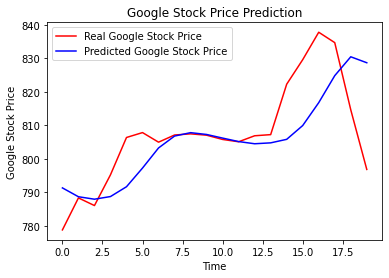

In [20]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## Part 4 - Evaluating the Recurrent Neural Network

### Calculating the Root Mean Squared Error (RMSE)

In [21]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

12.261958886372431


### Calculating the Relative Error

In [22]:
Relative_Error = rmse / 800
print(Relative_Error)

0.01532744860796554
